### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Univariate Classification II

 3. Logistic Regression - Decision Boundary.




---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

   https://colab.research.google.com/drive/1oe3AGq5RqGL38DLSPSZ73Gk5VlwNpJIn

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project74** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Nowadays, social media advertising is one of the popular forms of advertising. Advertisers can utilise a user's demographic information and target their ads accordingly.

Build a Logistic Regression model to determine whether or not a user will purchase a particular product displayed on a social network ad by analysing the impact of the age of the user.



---

### List of Activities

**Activity 1:** Analyse the Dataset

  
**Activity 2:**  Normalise the Dataset

**Activity 3:**  Calculate the Sigmoid Output

**Activity 4:** Model Prediction

**Activity 5:** Model Evaluation

**Activity 6**: Experiment and Compare Performance With Some Threshold Values

---

#### Activity 1:  Analysing the Dataset



- Create a Pandas DataFrame for a **Social Network** dataset using the below link. This dataset consists of the following columns:

|Field|Description|
|---:|:---|
|UserID|Unique ID|
|Gender|Male or Female|
|Age|Age of a person|
|EstimatedSalary|Salary of a person|
|Purchased|‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.|


 **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/social-network-ads.csv


- Print first five rows of the dataset.


In [ ]:
# Import the required modules and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
df  = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/social-network-ads.csv')

In [ ]:
# Print first five rows of the dataframe.
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
# Check for null values
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


**Q:** Are there any missing values?

**A:** NO

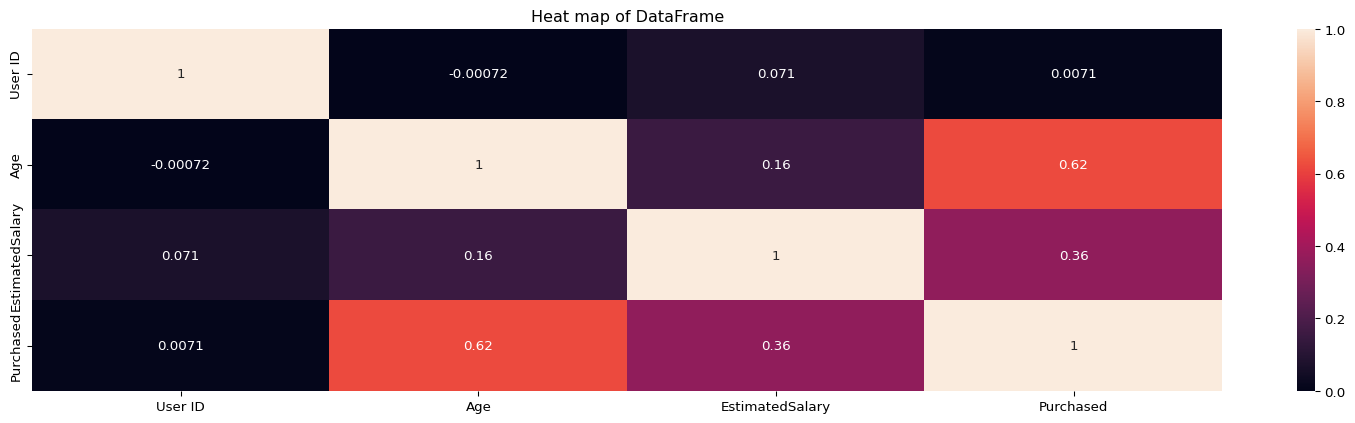

In [ ]:
# Create a heatmap to identify the relation between attributes
plt.figure(figsize =(20,5),dpi = 96)
plt.title("Heat map of DataFrame")
sns.heatmap(df.corr(),annot = True)
plt.show()

**Q:** Which attribute(s) has the strongest relationship with the `Purchased` feature? Why?

**A:**  `Age` attribute(s) has the strongest relationship with the `Purchased` feature as the numeric is close to 1.

---

#### Activity 2:  Normalise the Dataset

 Perform the following tasks:

 - Get the descriptive statistics for the `Age` column.

 - Normalise the `Are` column values by calculating their $Z$-scores (or standard scaler).



count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


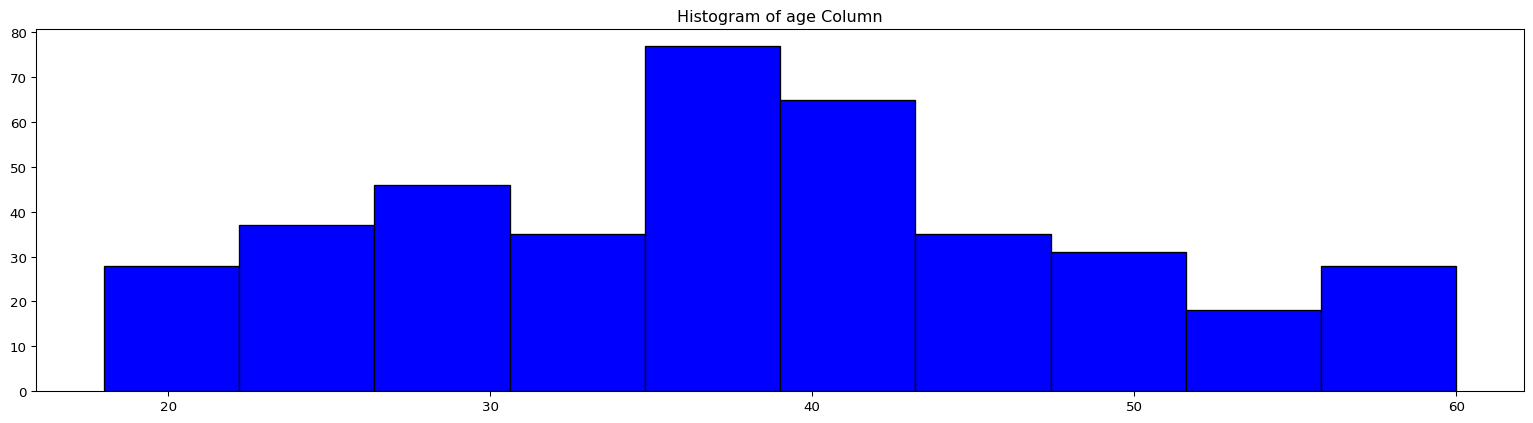

In [ ]:
# Get the descriptive statistics for the 'Age' column.
print(df['Age'].describe())
# Plot a histogram to show the distribution of values for the 'Age' column.
plt.figure(figsize =(20,5),dpi = 96)
plt.title("Histogram of age Column")
plt.hist(df['Age'],bins = 'sturges',color = 'blue',edgecolor = 'black')
plt.show()

count    4.000000e+02
mean    -2.486900e-16
std      1.000000e+00
min     -1.874962e+00
25%     -7.540869e-01
50%     -6.248285e-02
75%      7.960601e-01
max      2.131571e+00
Name: Age, dtype: float64


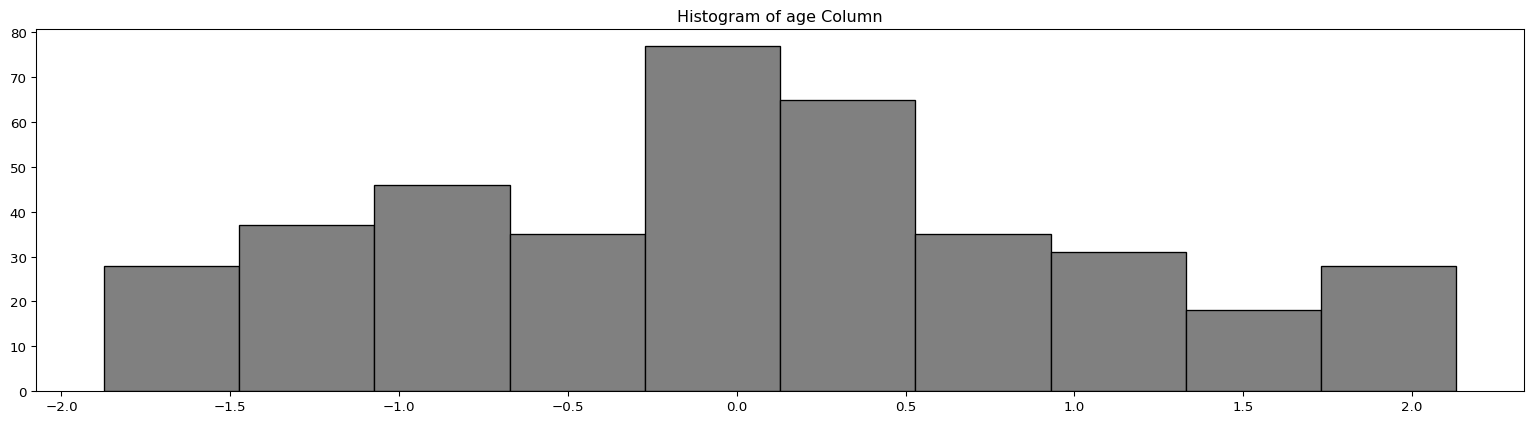

In [ ]:
# Normalise the 'Age' column values using the standard scaler method.
def z_score(series):
    z  = (series - series.mean())/ series.std()
    return z

# Get the descriptive statistics for the normalised 'Age' column.
age_cl = z_score(df['Age'])
print(age_cl.describe())
# Plot a histogram to show the distribution of values for the normalised 'age' column.
plt.figure(figsize =(20,5),dpi = 96)
plt.title("Histogram of age Column")
plt.hist(age_cl,bins = 'sturges',color = 'grey',edgecolor = 'black')
plt.show()

---

#### Activity 3:  Calculate the Sigmoid Output

1. Create a sigmoid function.

2.  Calculate the sigmoid output for the scaled (or Normalised) `Age` values.

In [ ]:
# Create a sigmoid() function using the above formula.
def sigmoid(x):
    return pd.Series(1/(1 + np.exp(-x)))

In [ ]:
# Calculate the sigmoid output for the scaled (or normalised) Age values.
print("\n Age sigmoid Output \n ","----"*10)
age_sig_output = sigmoid(df['Age'])
print(age_sig_output.describe())
print("\n Age scaled sigmoid Output \n","----"*10)
age_scaled_sig_output= sigmoid(age_cl)
print(age_scaled_sig_output)

# Get the descriptive statistics for the sigmoid output of the normalised 'Age'.
print("\n Decriptive statistics for the sigmoid output of the normalised 'Age' \n ","---"*22)
print(age_scaled_sig_output.describe())


 Age sigmoid Output 
  ----------------------------------------
count    4.000000e+02
mean     1.000000e+00
std      1.850411e-09
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Age, dtype: float64

 Age scaled sigmoid Output 
 ----------------------------------------
0      0.144356
1      0.437019
2      0.247533
3      0.265725
4      0.144356
         ...   
395    0.689131
396    0.781261
397    0.764522
398    0.460613
399    0.746918
Name: Age, Length: 400, dtype: float64

 Decriptive statistics for the sigmoid output of the normalised 'Age' 
  ------------------------------------------------------------------
count    400.000000
mean       0.497031
std        0.212792
min        0.132969
25%        0.319999
50%        0.484384
75%        0.689131
max        0.893934
Name: Age, dtype: float64


---

#### Activity 4:  Model Prediction

Consider the threshold probability value of 0.5.

- Create a function that classifies the sigmoid output for the scaled  `Age` values into 0s and 1s using a threshold value of 0.5.


In [ ]:
# Create a function 'predict()' that takes the sigmoid output and the threshold
# and returns a Pandas series containing the predicted values (0s and 1s) as the output.
def predict(sig,thre):
    y_pred = [1 if i >= thre else 0 for i in sig]
    series = pd.Series(y_pred)
    return series


In [ ]:
# Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
# Consider a threshold value of 0.5.
thresold =  0.5
y_pred1 = predict(age_scaled_sig_output,thresold)
print(y_pred1)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Length: 400, dtype: int64


---

#### Activity 5:  Model Evaluation

Evaluate the model by calculating the number of false positives and false negatives using a confusion matrix. Also, print the classification report for the predicted values.

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Purchased'], y_pred1))

[[181  76]
 [ 29 114]]


In [ ]:
# Print the classification report for the predicted values.
print(classification_report(df['Purchased'], y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78       257
           1       0.60      0.80      0.68       143

    accuracy                           0.74       400
   macro avg       0.73      0.75      0.73       400
weighted avg       0.77      0.74      0.74       400



**Q** Write the count of f1-score for both the labels?

**A:** The count of f1-score for both the labels is 0.78 and 0.68 respectively.

---

#### Activity 6: Experiment and Compare Performance With Some Threshold Values

Try threshold values =$[0.1,0.3,0.5,0.7,0.9]$ and compare their performance. Plot a graph to visualise.

[0.3575, 0.5675, 0.7375, 0.82, 0.6425]


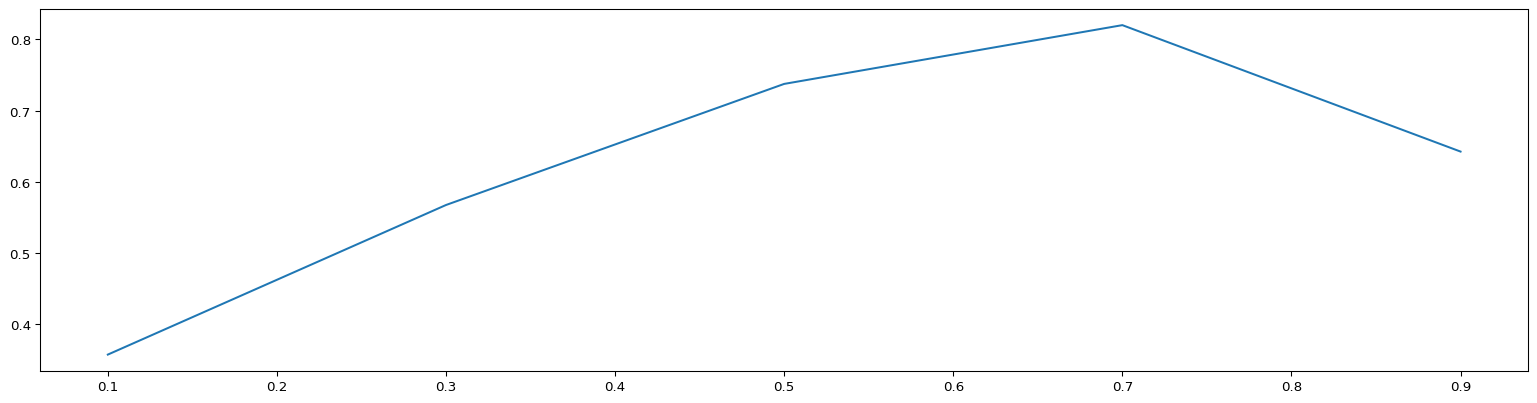

In [ ]:
# function to calculate accuracy
def accuracy_func(X, y_pred):
    count = 0
    for i in range(len(X)):
        if X[i] == y_pred[i]:
            count += 1
    return count/ len(X)


# Calculate accuracy and save it in the accuracy list

threshold = [0.1,0.3,0.5,0.7,0.9]
accuracy = []
for i in threshold:
    y_pred = predict(age_scaled_sig_output,i)
    accuracy.append(accuracy_func(df['Purchased'],y_pred))

# print the accuracy values
print(accuracy)

#Plot graph to visualise the accuracy for various thresholds

plt.figure(figsize=(20,5),dpi = 96)
plt.plot(threshold,accuracy)

# function to show the plot

plt.show()


**Q:** What are your observations for change in accuracy with respect to threshold values? Why do you think this is the case?

**A:**

**Reason**:

---

####  Extra challenging question

**Q:** Please have a look at other activation function like ReLU and tanh. Also, justify your recommendation. (Try to come up with advantages and disadvantages for them when compared to sigmoid.)



**A:**

**Observations:**




### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project74**) of the notebook will get copied.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project74** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---